In [0]:
# import TensorFlow, Keras
import tensorflow as tf
from tensorflow import keras


Load data - augmented images and labels have been serialized to pickles file and are available at https://drive.google.com/drive/folders/1QLFdWRIwaXv_PX99BT9_g7A3WCprs03y?usp=sharing

To run this code, copy X_data1.pickle and y_data1.pickle to your the root of your Google drive.

These files contain 5130  images in each category, of size 100x100


In [2]:
# load data
import pickle
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')
with open('/content/drive/My Drive/X_data1.pickle', 'rb') as f1:     
    X = pickle.load(f1)

with open('/content/drive/My Drive/y_data1.pickle', 'rb') as f2:
    y = pickle.load(f2)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Split the images and labels to Test, Train and Validation sets

In [0]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
X_valid,X_test,y_valid,y_test = train_test_split(X_test,y_test,test_size=0.4)
np.random.seed(200)
np.random.shuffle(X_train)
np.random.seed(200)
np.random.shuffle(X_test)
np.random.seed(200)
np.random.shuffle(y_train)
np.random.seed(200)
np.random.shuffle(y_test)
np.random.seed(200)
np.random.shuffle(X_valid)
np.random.seed(200)
np.random.shuffle(y_valid)

In [18]:
#Get the shape of X_train and y_train
print('X_train shape:', X_train.shape) #4D array 30,780 rows 100x100 pixel image with depth = 3 visible wave lenghts (RGB)
print('y_train shape:', y_train.shape) #2D array 30,780 rows and 1 column

#Get the shape of X_valid and y_valid
print('X_valid shape:', X_valid.shape) #4D array 6,156 rows 100x100 pixel image with depth = 3 visible wave lenghts (RGB)
print('y_valid shape:', y_valid.shape) #2D array 6,156 rows and 1 column

#Get the shape of X_test and y_test
print('X_test shape:', X_test.shape) #4D array 4,104 rows 100x100 pixel image with depth = 3 visible wave lenghts (RGB)
print('y_test shape:', y_test.shape) #2D array 4,104 rows and 1 column

X_train shape: (30780, 100, 100, 3)
y_train shape: (30780, 1)
X_valid shape: (6156, 100, 100, 3)
y_valid shape: (6156, 1)
X_test shape: (4104, 100, 100, 3)
y_test shape: (4104, 1)


Show the first image and label from the training set

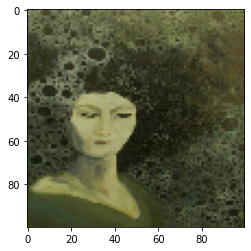

The label is: [6]


In [19]:
import matplotlib.pyplot as plt
img = plt.imshow(X_train[0])
plt.show()
print('The label is:', y_train[0])

Normalize the data

In [0]:
X_train = X_train / 255.0
X_test = X_test / 255.0
X_valid = X_valid / 255.0

Fine-tuning xception model

In [21]:
base_model = keras.applications.xception.Xception(weights="imagenet", include_top=False)

avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(8, activation="softmax")(avg)
model = keras.Model(inputs=base_model.input, outputs=output)

for layer in base_model.layers:
  layer.trainable = False
optimizer = keras.optimizers.SGD(lr=0.2, momentum=0.9, decay=0.01)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

83689472/83683744 [==============================] - 2s 0us/step


Fit the model

In [22]:
history = model.fit(X_train.reshape((X_train.shape[0], 100, 100, 3)), y_train, epochs=5, validation_data=(X_valid.reshape((X_valid.shape[0], 100, 100, 3)),y_valid))

Epoch 1/5
962/962 [==============================] - 563s 585ms/step - loss: 4.4921 - accuracy: 0.3915 - val_loss: 2.5590 - val_accuracy: 0.4251
Epoch 2/5
962/962 [==============================] - 563s 585ms/step - loss: 1.8049 - accuracy: 0.5075 - val_loss: 2.1078 - val_accuracy: 0.4420
Epoch 3/5
962/962 [==============================] - 563s 586ms/step - loss: 1.4454 - accuracy: 0.5450 - val_loss: 1.8949 - val_accuracy: 0.4625
Epoch 4/5
962/962 [==============================] - 569s 592ms/step - loss: 1.3225 - accuracy: 0.5639 - val_loss: 1.8162 - val_accuracy: 0.4727
Epoch 5/5
962/962 [==============================] - 571s 594ms/step - loss: 1.2453 - accuracy: 0.5762 - val_loss: 1.8001 - val_accuracy: 0.4683


In [0]:
# save the model
model.save("model_xception.hdf5")

Train the model further with the base layers unfrozen

In [25]:
# The model can be further trained with base layers unfrozen
for layer in base_model.layers:
  layer.trainable = True

optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9, decay=0.01)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

history = model.fit(X_train.reshape((X_train.shape[0], 100, 100, 3)), y_train, epochs=40, validation_data=(X_valid.reshape((X_valid.shape[0], 100, 100, 3)),y_valid))

Epoch 1/40
 16/962 [..............................] - ETA: 47:44 - loss: 1.4520 - accuracy: 0.4922

KeyboardInterrupt: ignored

In [0]:
# save the model
model.save("model_xception.hdf5")

Evaluate the model

In [0]:
model.evaluate(X_test.reshape(X_test.shape[0], 100, 100, 3), y_test)

Draw chart

In [0]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
model2 = load_model("model_xception.hdf5")

plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.show()

